In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# # create a placeholder for an encoded (32-dimensional) input
# encoded_input = Input(shape=(4, 4, 8))
# # retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # create the decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input))

Using TensorFlow backend.


In [23]:
from keras.datasets import mnist
import numpy as np
# (x_train, _), (x_test, _) = mnist.load_data()

x_train = np.array(dp.get_image_batch(1000, (28, 28)))
x_test = np.array(dp.get_image_batch(200, (28, 28)))

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
print(x_train.shape)
print( x_test.shape)

(1000, 28, 28, 1)
(200, 28, 28, 1)


In [27]:
%%time
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1000 samples, validate on 200 samples
Epoch 1/200
1000/1000 [==============================] - 0s - loss: 0.2221 - val_loss: 0.2232
Epoch 2/200
1000/1000 [==============================] - 0s - loss: 0.2249 - val_loss: 0.2229
Epoch 3/200
1000/1000 [==============================] - 0s - loss: 0.2251 - val_loss: 0.2234
Epoch 4/200
1000/1000 [==============================] - 0s - loss: 0.2223 - val_loss: 0.2227
Epoch 5/200
1000/1000 [==============================] - 0s - loss: 0.2209 - val_loss: 0.2232
Epoch 6/200
1000/1000 [==============================] - 0s - loss: 0.2216 - val_loss: 0.2231
Epoch 7/200
1000/1000 [==============================] - 0s - loss: 0.2269 - val_loss: 0.2213
Epoch 8/200
1000/1000 [==============================] - 0s - loss: 0.2171 - val_loss: 0.2196
Epoch 9/200
1000/1000 [==============================] - 0s - loss: 0.2219 - val_loss: 0.2206
Epoch 10/200
1000/1000 [==============================] - 0s - loss: 0.2220 - val_loss: 0.2204
Epoch 11/200

1000/1000 [==============================] - 0s - loss: 0.2048 - val_loss: 0.2059
Epoch 87/200
1000/1000 [==============================] - 0s - loss: 0.2093 - val_loss: 0.2069
Epoch 88/200
1000/1000 [==============================] - 0s - loss: 0.2053 - val_loss: 0.2063
Epoch 89/200
1000/1000 [==============================] - 0s - loss: 0.2039 - val_loss: 0.2021
Epoch 90/200
1000/1000 [==============================] - 0s - loss: 0.2013 - val_loss: 0.2042
Epoch 91/200
1000/1000 [==============================] - 0s - loss: 0.2073 - val_loss: 0.2106
Epoch 92/200
1000/1000 [==============================] - 0s - loss: 0.2103 - val_loss: 0.2077
Epoch 93/200
1000/1000 [==============================] - 0s - loss: 0.2049 - val_loss: 0.2043
Epoch 94/200
1000/1000 [==============================] - 0s - loss: 0.2056 - val_loss: 0.2067
Epoch 95/200
1000/1000 [==============================] - 0s - loss: 0.2050 - val_loss: 0.2049
Epoch 96/200
1000/1000 [==============================] - 0s - 

1000/1000 [==============================] - 0s - loss: 0.1991 - val_loss: 0.2000
Epoch 172/200
1000/1000 [==============================] - 0s - loss: 0.1966 - val_loss: 0.1964
Epoch 173/200
1000/1000 [==============================] - 0s - loss: 0.1929 - val_loss: 0.1942
Epoch 174/200
1000/1000 [==============================] - 0s - loss: 0.1946 - val_loss: 0.1978
Epoch 175/200
1000/1000 [==============================] - 0s - loss: 0.1956 - val_loss: 0.1968
Epoch 176/200
1000/1000 [==============================] - 0s - loss: 0.1963 - val_loss: 0.1983
Epoch 177/200
1000/1000 [==============================] - 0s - loss: 0.1954 - val_loss: 0.1952
Epoch 178/200
1000/1000 [==============================] - 0s - loss: 0.1908 - val_loss: 0.1928
Epoch 179/200
1000/1000 [==============================] - 0s - loss: 0.1916 - val_loss: 0.1968
Epoch 180/200
1000/1000 [==============================] - 0s - loss: 0.1977 - val_loss: 0.1972
Epoch 181/200
1000/1000 [=============================

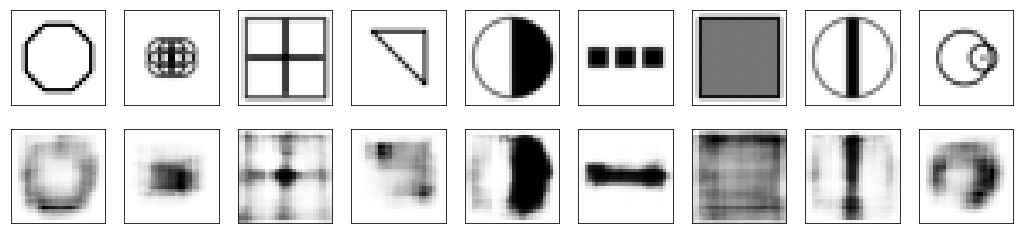

In [28]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

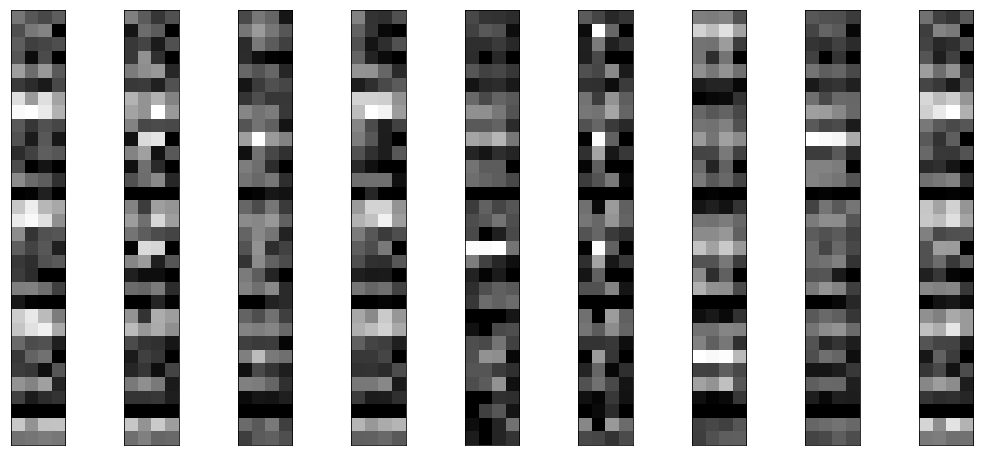

In [31]:
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()